### Plotting Scripts for Vertex and Edge Distributions of all Experiments

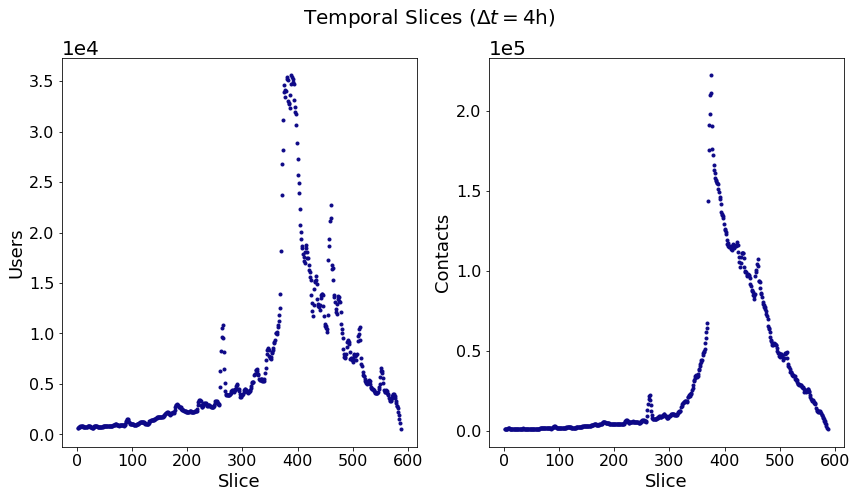

<Figure size 432x288 with 0 Axes>

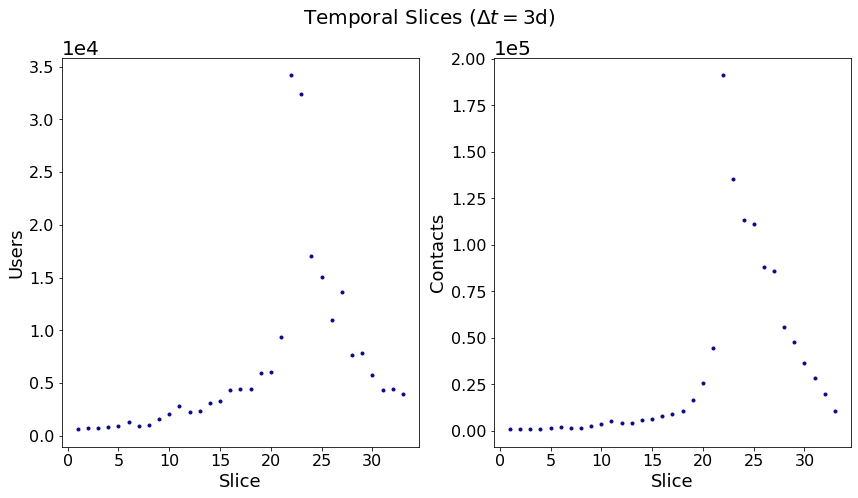

<Figure size 432x288 with 0 Axes>

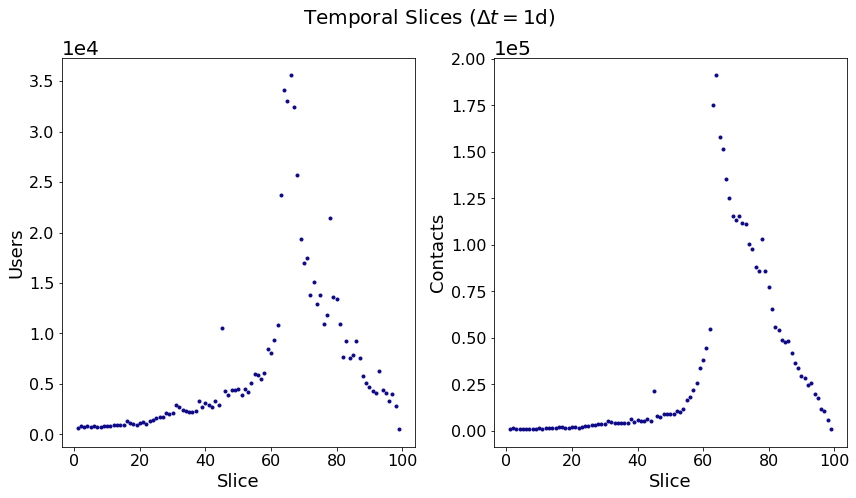

2020-05-10 03:09:36


<Figure size 432x288 with 0 Axes>

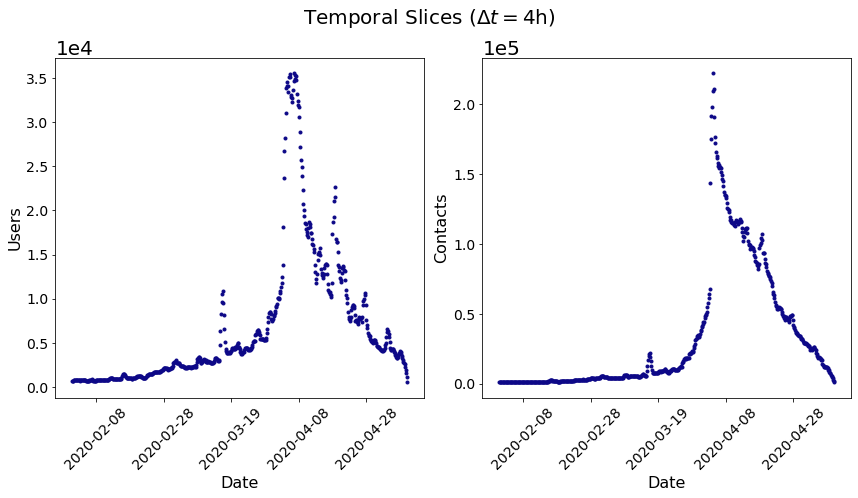

2020-05-10 08:00:00


<Figure size 432x288 with 0 Axes>

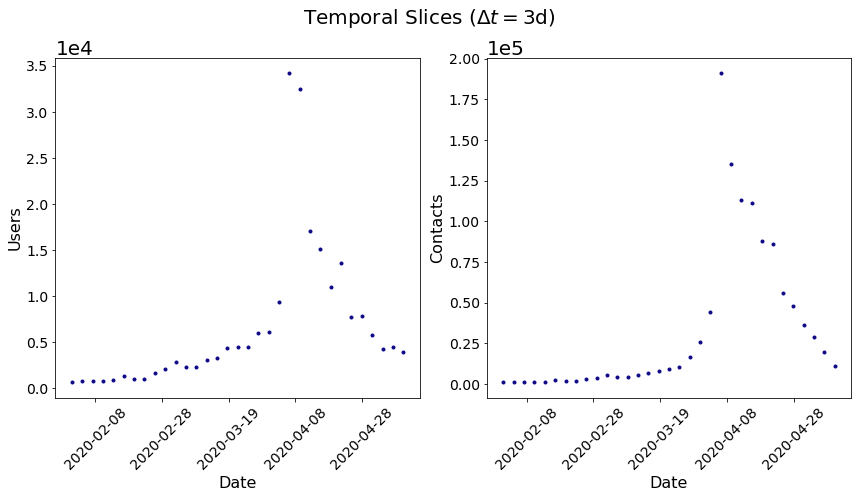

2020-05-10 15:12:00


<Figure size 432x288 with 0 Axes>

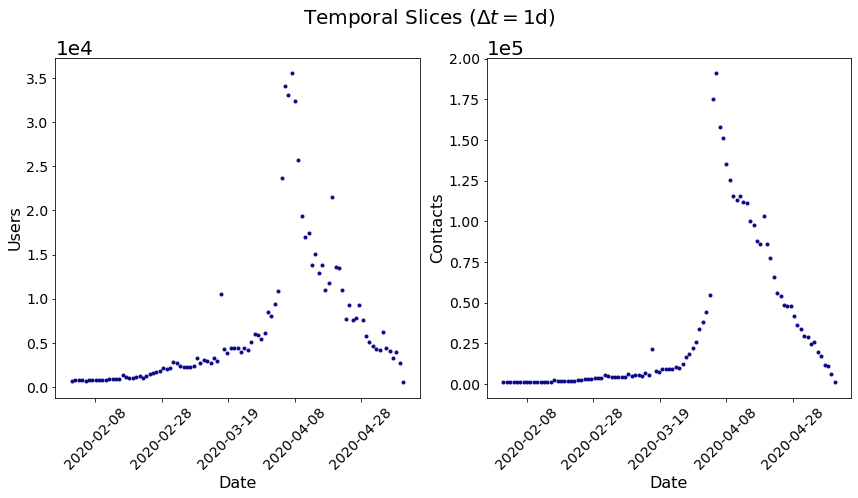

<Figure size 432x288 with 0 Axes>

In [1]:
# ------------- DELTA SLICES -------------------


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#Plotting lenght of labels and graph files

import datetime

cmap = cm.get_cmap('plasma')
the_color = cmap(0)
#FELLES-------
start = datetime.datetime.strptime("01-02-2020:00", "%d-%m-%Y:%H")
end = datetime.datetime.strptime("10-05-2020:00", "%d-%m-%Y:%H")
diff = end - start
days, seconds = diff.days, diff.seconds
hours = days * 24 + seconds // 3600
#-------------
D_1_interval = days 
D_1_step = 24 + 0.4 #Results in midday 10/05/2020


H_4_interval = hours //4 -7
H_4_step = 4.06  #Results in early 10/05/2020

D_3_interval = days // 3
D_3_step = 3*24+ 2.5  #Results in early 10/05/2020

intervals = [H_4_interval, D_3_interval, D_1_interval]
steps = [H_4_step, D_3_step, D_1_step]

expn = [8,9,7]
times = [[4,"h"], [3,"d"], [1,"d"]]
path_to_res = ["../../experiment8/statistics/ExpStats/", "../../experiment9/statistics/ExpStats/", "../../experiment7/statistics/ExpStats/"]

for i in range(len(expn)):
    e = str(expn[i])
    dt = times[i]
    labels_file = path_to_res[i] + "len_labels.npy"
    graphs_file = path_to_res[i] + "len_graphs.npy"

    labels = np.load(labels_file)
    graphs = np.load(graphs_file)

    numS = [i+1 for i in range(len(labels))]
    numS = np.array(numS)

    fz =20
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.suptitle(r"Temporal Slices ($\Delta t =$%i%s)"%(dt[0],dt[1]), fontsize = fz)
    axs[0].plot(numS, labels, ".", color = the_color)
    #axs[0].set_title('Nodes', fontsize = fz-2)
    axs[0].set_ylabel("Users", fontsize = fz-2) 
    axs[0].set_xlabel('Slice', fontsize = fz-2)
    axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[0].yaxis.get_offset_text().set_fontsize(fz)
    plt.sca(axs[0])
    plt.xticks(fontsize=fz-4)
    plt.yticks(fontsize=fz-4)

    axs[1].plot(numS, graphs, ".", color = the_color)
    #axs[1].set_title('Contacts', fontsize = fz-2)
    axs[1].set_ylabel("Contacts", fontsize = fz-2) 
    axs[1].set_xlabel('Slice', fontsize = fz-2) 
    axs[1].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[1].yaxis.get_offset_text().set_fontsize(fz)
    plt.sca(axs[1])
    plt.xticks(fontsize=fz-4)
    plt.yticks(fontsize=fz-4)
    fig.tight_layout(pad=1.0)

    path_to_plot = "./plots_from_notebook/" 
    plt.savefig(path_to_plot + f"exp{e}_num_contacts_and_nodes.pdf")
    plt.show()
    plt.clf()


from matplotlib.ticker import MaxNLocator
for i in range(len(expn)):
    e = str(expn[i])
    dt = times[i]
    step = steps[i]
    intervall = intervals[i]

    labels_file = path_to_res[i] + "len_labels.npy"
    graphs_file = path_to_res[i] + "len_graphs.npy"

    labels = np.load(labels_file)
    graphs = np.load(graphs_file)

    numS = [j+1 for j in range(len(labels))]
    numS = np.array(numS)

    
    date_list = [start + datetime.timedelta(hours=x*step) for x in range(0, intervall)]
    print(date_list[-1])

    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.suptitle(r"Temporal Slices ($\Delta t =$%i%s)"%(dt[0],dt[1]), fontsize = 20)
    axs[0].plot(date_list, labels, ".", color = the_color)
    #axs[0].set_title('Nodes', fontsize = 16)
    axs[0].set_ylabel("Users", fontsize = 16) 
    axs[0].set_xlabel('Date', fontsize = 16) 
    axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[0].yaxis.get_offset_text().set_fontsize(fz)
    axs[0].xaxis.set_major_locator(MaxNLocator(6))
    axs[0].tick_params("x",labelrotation=45)
    plt.sca(axs[0])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    axs[1].plot(date_list, graphs, ".", color = the_color)
    #axs[1].set_title('Contacts', fontsize = 16)
    axs[1].set_ylabel("Contacts", fontsize = 16) 
    axs[1].set_xlabel('Date', fontsize = 16) 
    axs[1].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[1].xaxis.set_major_locator(MaxNLocator(6))
    axs[1].yaxis.get_offset_text().set_fontsize(fz)
    axs[1].tick_params("x",labelrotation=45)
    plt.sca(axs[1])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    fig.tight_layout(pad=1.0)

    path_to_plot = "./plots_from_notebook/" 
    plt.savefig(path_to_plot + f"exp{e}_num_contacts_and_nodes_DATES.pdf")
    plt.show()
    plt.clf()

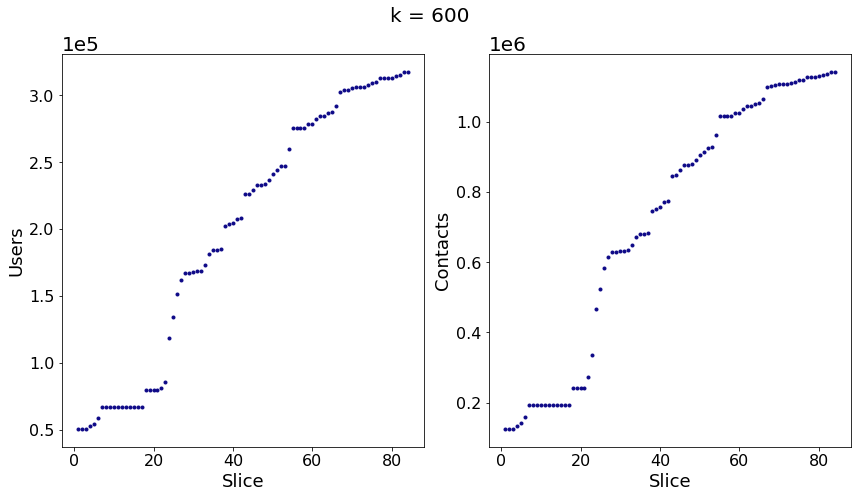

<Figure size 432x288 with 0 Axes>

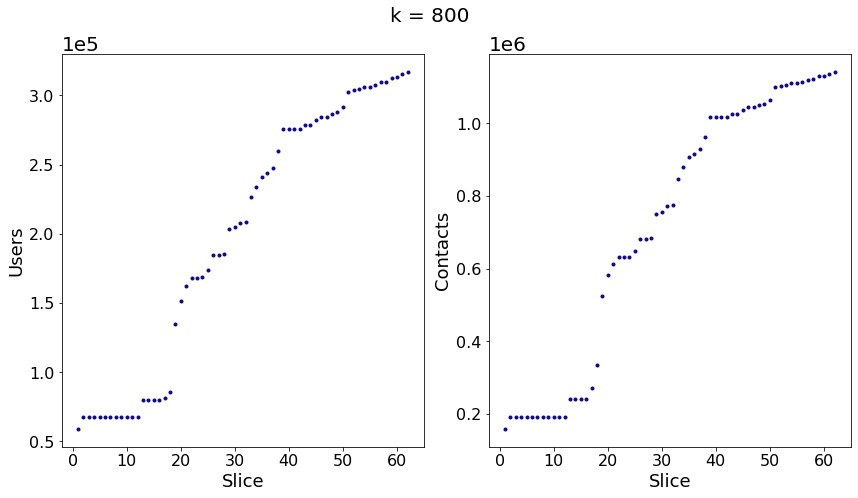

<Figure size 432x288 with 0 Axes>

In [2]:
# ------------- K-EXPERIMENTS -------------------


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#Plotting lenght of labels and graph files

expn = [600,800]
path_to_res = ["../../experiment600/statistics/ExpStats/", "../../experiment800/statistics/ExpStats/"]

for i in range(len(expn)):
    e = str(expn[i])
    labels_file = path_to_res[i] + "len_labels.npy"
    graphs_file = path_to_res[i] + "len_graphs.npy"

    labels = np.load(labels_file)
    graphs = np.load(graphs_file)

    numS = [i+1 for i in range(len(labels))]
    numS = np.array(numS)

    fz =20
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.suptitle(f"k = {e}", fontsize = fz)
    axs[0].plot(numS, labels, ".", color = the_color)
    #axs[0].set_title('Nodes', fontsize = fz-2)
    axs[0].set_ylabel("Users", fontsize = fz-2) 
    axs[0].set_xlabel('Slice', fontsize = fz-2)
    axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[0].yaxis.get_offset_text().set_fontsize(fz)
    plt.sca(axs[0])
    plt.xticks(fontsize=fz-4)
    plt.yticks(fontsize=fz-4)

    axs[1].plot(numS, graphs, ".", color = the_color)
    #axs[1].set_title('Contacts', fontsize = fz-2)
    axs[1].set_ylabel("Contacts", fontsize = fz-2) 
    axs[1].set_xlabel('Slice', fontsize = fz-2) 
    axs[1].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
    axs[1].yaxis.get_offset_text().set_fontsize(fz)
    plt.sca(axs[1])
    plt.xticks(fontsize=fz-4)
    plt.yticks(fontsize=fz-4)
    fig.tight_layout(pad=1.0)

    path_to_plot = "./plots_from_notebook/" 
    plt.savefig(path_to_plot + f"exp{e}_num_contacts_and_nodes.pdf")
    plt.show()
    plt.clf()

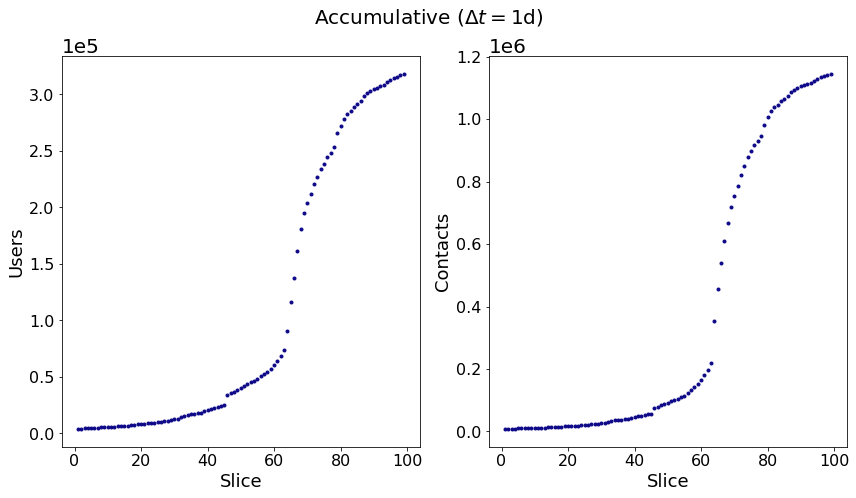

<Figure size 432x288 with 0 Axes>

In [3]:
#------------- ACCUMULATIVE -------------------------

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#Plotting lenght of labels and graph files

path_to_res = "../../experiment6/statistics/ExpStats/"


labels_file = path_to_res + "len_labels.npy"
graphs_file = path_to_res + "len_graphs.npy"

labels = np.load(labels_file)
graphs = np.load(graphs_file)

numS = [i+1 for i in range(len(labels))]
numS = np.array(numS)

fz = 20
fig, axs = plt.subplots(1, 2, figsize=(12,7))
fig.suptitle(r"Accumulative ($\Delta t = 1$d)", fontsize = fz)
axs[0].plot(numS, labels, ".", color = the_color)
#axs[0].set_title('Nodes', fontsize = fz-2)
axs[0].set_ylabel("Users", fontsize = fz-2) 
axs[0].set_xlabel('Slice', fontsize = fz-2)
axs[0].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
axs[0].yaxis.get_offset_text().set_fontsize(fz)
plt.sca(axs[0])
plt.xticks(fontsize=fz-4)
plt.yticks(fontsize=fz-4)

axs[1].plot(numS, graphs, ".", color = the_color)
#axs[1].set_title('Contacts', fontsize = fz-2)
axs[1].set_ylabel("Contacts", fontsize = fz-2) 
axs[1].set_xlabel('Slice', fontsize = fz-2) 
axs[1].ticklabel_format(axis='y', style='scientific',scilimits=(0,0))
axs[1].yaxis.get_offset_text().set_fontsize(fz)
plt.sca(axs[1])
plt.xticks(fontsize=fz-4)
plt.yticks(fontsize=fz-4)
fig.tight_layout(pad=1.0)

path_to_plot = "./plots_from_notebook/" 
plt.savefig(path_to_plot + f"exp6_num_contacts_and_nodes.pdf")
plt.show()
plt.clf()





